<a href="https://colab.research.google.com/github/MaxKuzaj13/dw_matrix_time_series/blob/master/matrix_5_day_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import fbprophet
import pystan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error as mae
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation

from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric



In [2]:
# should be '0.6'
fbprophet.__version__


'0.6'

In [3]:
# should be '2.19.1.1'
pystan.__version__

'2.19.1.1'

In [5]:
path= 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/visits.csv'
df = pd.read_csv(path, parse_dates=['published'], index_col='published')
df.head()

,post_id
published,
2008-01-01 18:19:00,18284
2008-01-01 18:30:00,18285
2008-01-01 18:34:00,18286
2008-01-02 01:32:00,18291
2008-01-02 14:34:00,18294


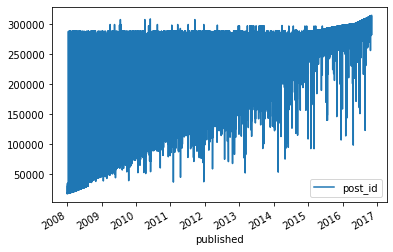

In [6]:
df.plot()

In [7]:
df.resample('1y').count()

,post_id
published,
2008-12-31,7743
2009-12-31,10783
2010-12-31,13091
2011-12-31,15063
2012-12-31,15972
2013-12-31,15537
2014-12-31,16180
2015-12-31,23452
2016-12-31,16316


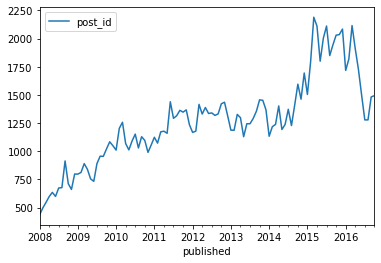

In [10]:
df.resample('1M').count().plot();

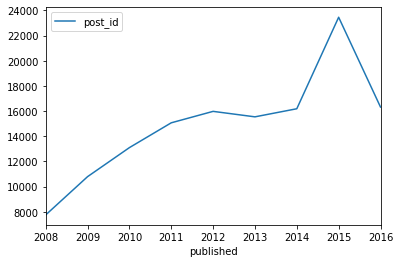

In [11]:
df.resample('1y').count().plot();

In [13]:
df_day = df.resample('1D').count().reset_index()
df_day.columns = ['ds', 'y']
df_day.head()

,ds,y
0,2008-01-01,3
1,2008-01-02,3
2,2008-01-03,4
3,2008-01-04,14
4,2008-01-05,4


In [0]:
num_points_to_pred = 30
train = df_day[:-num_points_to_pred]
test = df_day[-num_points_to_pred:]

In [17]:
m =Prophet()
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
futre= m.make_future_dataframe(periods = num_points_to_pred, freq='D', include_history= True)
futre

,ds
0,2008-01-01
1,2008-01-02
2,2008-01-03
3,2008-01-04
4,2008-01-05
...,...
3222,2016-10-27
3223,2016-10-28
3224,2016-10-29
3225,2016-10-30


In [0]:
forcast = m.predict(futre)

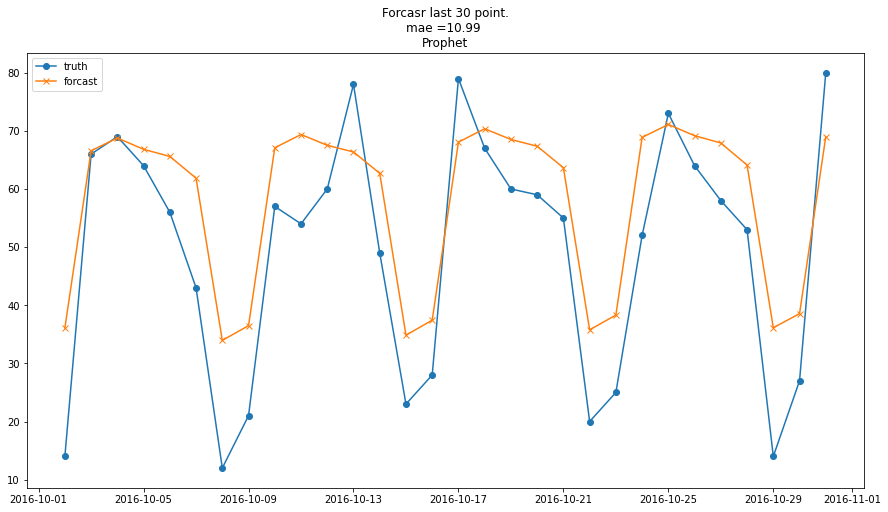

In [36]:
def plot_forecast(test, forcast):
  forcast = forcast[-num_points_to_pred:]
  score = np.round(mae(test.y, forcast.yhat), 2)
  plt.figure(figsize = (15,8))
  plt.title('Forcasr last {} point.\nmae ={} \nProphet'.format(num_points_to_pred, score))
  plt.plot(test.ds, test.y, 'o-', label = 'truth')
  plt.plot(test.ds, forcast.yhat, 'x-', label = 'forcast')
  plt.legend();

plot_forecast(test, forcast)

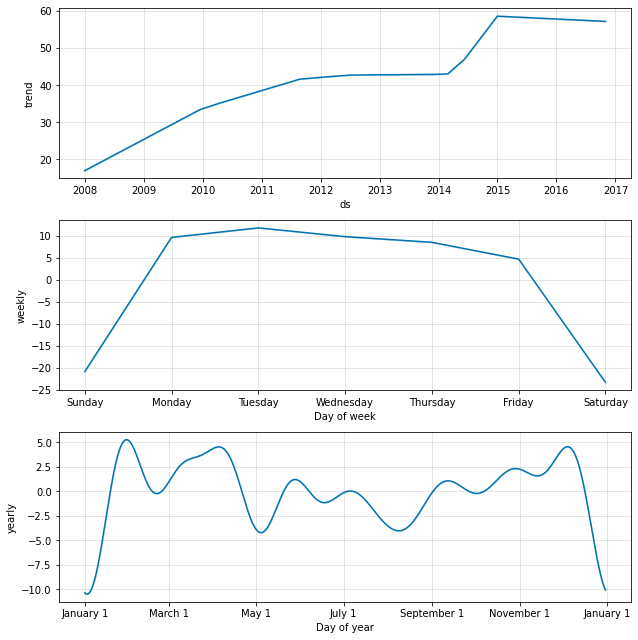

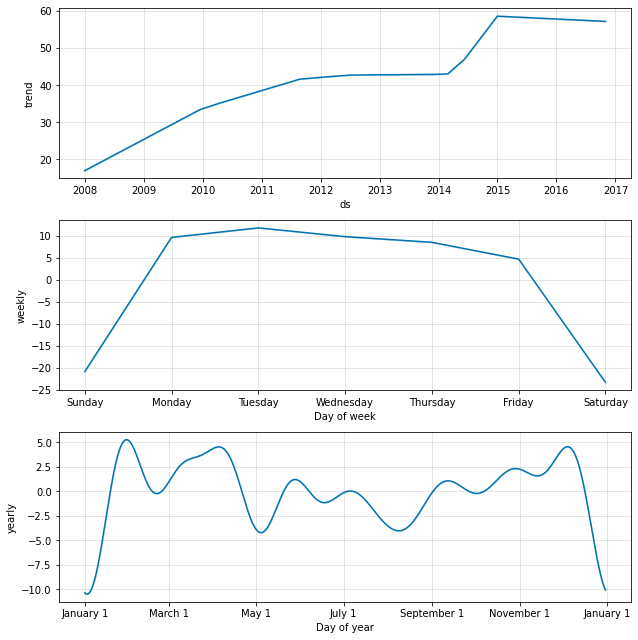

In [37]:
m.plot_components(forcast)

*Advance* Dynamic Cross Validation

In [38]:
df_cv = cross_validation(m, initial='2500 days', period= '10 days', horizon= '30 days')

INFO:fbprophet:Making 67 forecasts with cutoffs between 2014-11-11 00:00:00 and 2016-09-01 00:00:00


In [41]:
df_cv.shape

(2010, 6)

In [42]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-11-12,52.398665,40.994021,64.337220,75,2014-11-11
1,2014-11-13,51.135341,39.050064,62.622150,72,2014-11-11
2,2014-11-14,48.724733,36.945087,60.587876,60,2014-11-11
3,2014-11-15,25.671027,13.939398,37.143779,20,2014-11-11
4,2014-11-16,26.743300,16.003382,38.877946,26,2014-11-11


Metrics

In [44]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,370.880636,19.258261,16.290693,0.564985,0.237616,0.427861
1,4 days,335.711357,18.322428,15.725948,0.435991,0.230491,0.427861
2,5 days,347.337215,18.636985,15.837603,0.477355,0.237049,0.452736
3,6 days,350.526290,18.722347,15.645785,0.460709,0.239833,0.467662
4,7 days,378.171895,19.446642,16.192848,0.468657,0.251411,0.447761
5,8 days,369.704813,19.227710,15.850465,0.437131,0.252164,0.462687
6,9 days,360.750587,18.993435,15.729791,0.436257,0.252077,0.457711
7,10 days,403.976353,20.099163,16.484744,0.472290,0.252164,0.462687
8,11 days,417.601795,20.435308,16.723957,0.585816,0.242194,0.452736
9,12 days,424.907083,20.613274,17.236055,0.588839,0.253703,0.422886


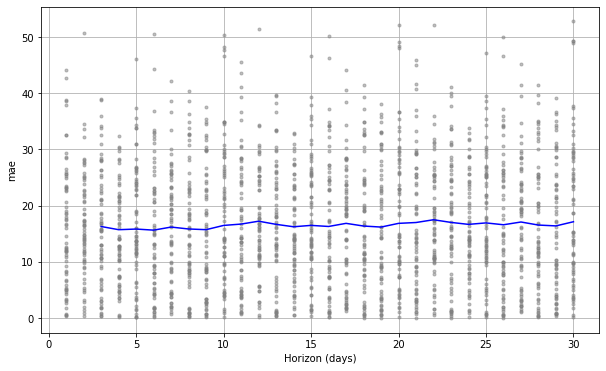

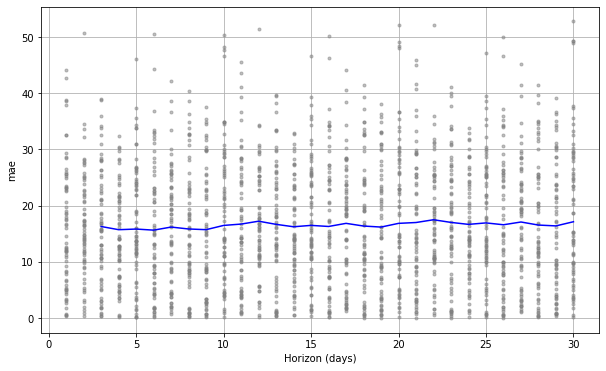

In [47]:
plot_cross_validation_metric(df_cv, 'mae')

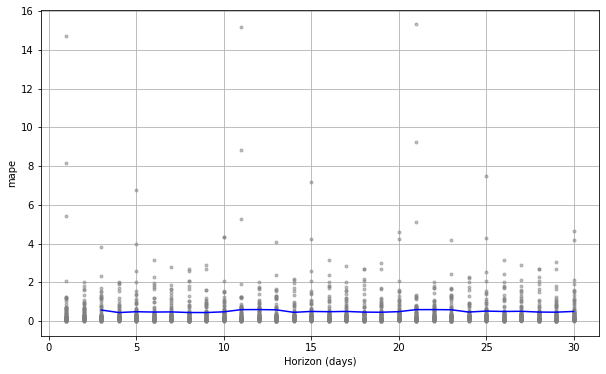

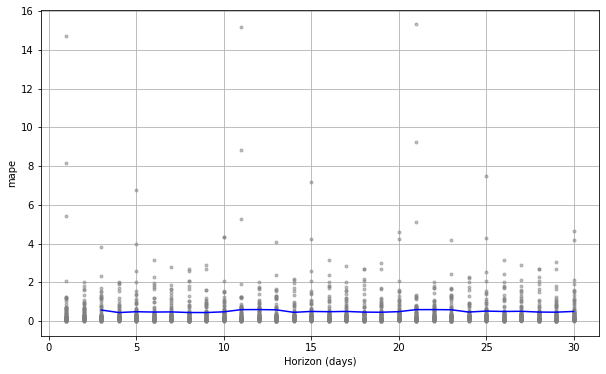

In [49]:
plot_cross_validation_metric(df_cv, 'mape')

Prophet